In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [57]:
states = 3
reps = 1000
trials = 1000
rewards = {0: {0: 1, 1: -1, 2: 2}, 
           1:{0: 8, 1: -8}, 
           2:{0: 0, 1: 4}}
v_exp = np.array([1, 0, 2])  # Expected value of each state


In [58]:
def update_act(state, t, policy):
    value = random.uniform(0, 1)
    length_act = len(policy[state][t, :])
    if length_act == 3:
        if value <= policy[state][t, 0]:
            return 0, True
        elif value <= (policy[state][t, 0] + policy[state][t, 1]): 
            return 1, False
        else: 
            return 2, True
    else: 
        if value <= policy[state][t, 0]:
            return 0, True
        else: 
            return 1, True

In [59]:
def update(lr_actor, lr, beta, trials, states, rewards):
    # Initialize storing vector 
    v = np.zeros((trials, states))
    policy = {i: np.zeros((trials, len(rewards[i]))) for i in range(len(rewards))}
    m = {i: np.zeros((trials, len(rewards[i]))) for i in range(len(rewards))}
    

    # Soft max function for initial
    for state in range(len(rewards)): 
        policy[state][0] = np.exp(m[state][0])/np.sum(np.exp(m[state][0]))

    # Go through trials
    for t in range(1, trials): 
        # Update from previous
        for state in range(states):
            m[state][t] = m[state][t-1] 
            policy[state][t] = policy[state][t-1]
            v[t] = v[t-1]

        # Go through states
        state = 0  # Initial
        terminal = False
        while not terminal: 
            action, terminal= update_act(state, t, policy)
            state_n = 1 if np.random.uniform(0, 1) < 0.5 else 2
            rew = rewards[state][action]
            v_next = 0 if terminal else v[t, state_n]
            sigma = rew + v_next - v[t, state]
            # Action values
            m[state][t, action] = m[state][t, action] + lr_actor * sigma
            #for i in range(3):
                #if i != action: 
                    #m[state][t, i] = (1-lr_actor)* m[state][t, action]
            
            # Softmax
            policy[state][t] = np.array([np.exp(m[state][t]*beta)])/np.sum(
                        np.exp(m[state][t]))

            # Update v
            v[t, state] += lr * sigma 
            state = state_n
    return v, policy


In [60]:
v_all = []
p_all = {0:[], 1:[], 2:[]}

for rep in range(reps): 
    v, policy = update(0, 0.2, 1, trials, states, rewards)
    v_all.append(v)

    for state in range(states): 
        p_all[state].append(policy[state])

v_all = np.asarray(v_all)
for state in p_all:
    p_all[state] = np.mean(np.asarray(p_all[state]), axis=0)

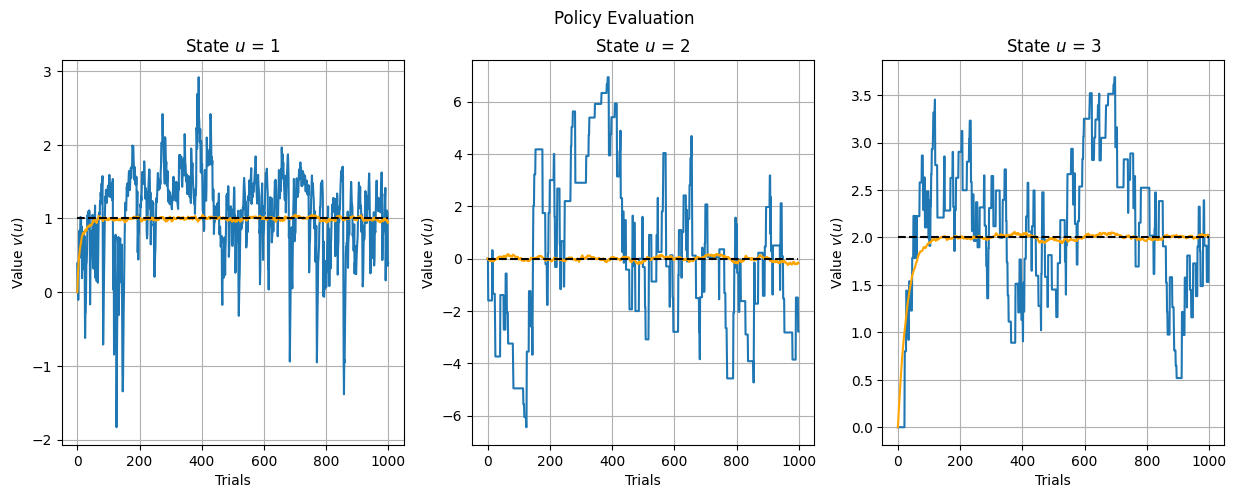

In [61]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
titles = ['State $u$ = 1', 'State $u$ = 2', 'State $u$ = 3']
for state in range(states):

    # First rep and average over reps 
    v = v_all[1]
    v_mean = np.mean(v_all, axis=0)

    # Plot
    ax[state].plot(range(trials), v[:, state], '-')
    ax[state].plot(range(trials), v_mean[:, state], c='orange')
    dash = np.full((trials), v_exp[state])
    ax[state].plot(range(trials), dash, '--', c='black')
    ax[state].set_xlabel('Trials')
    ax[state].set_ylabel('Value $v(u)$')
    ax[state].title.set_text(titles[state])
    ax[state].grid()

plt.suptitle('Policy Evaluation')
plt.show()


In [62]:
# Plot 9.9 
v_all = []
p_all = {0:[], 1:[], 2:[]}
for rep in range(reps): 
    v, policy = update(0.075, 0.2, 1, trials, states, rewards)
    v_all.append(v)

    for state in range(states): 
        p_all[state].append(policy[state])

v_all = np.asarray(v_all)
for state in p_all:
    p_all[state] = np.mean(np.asarray(p_all[state]), axis=0)

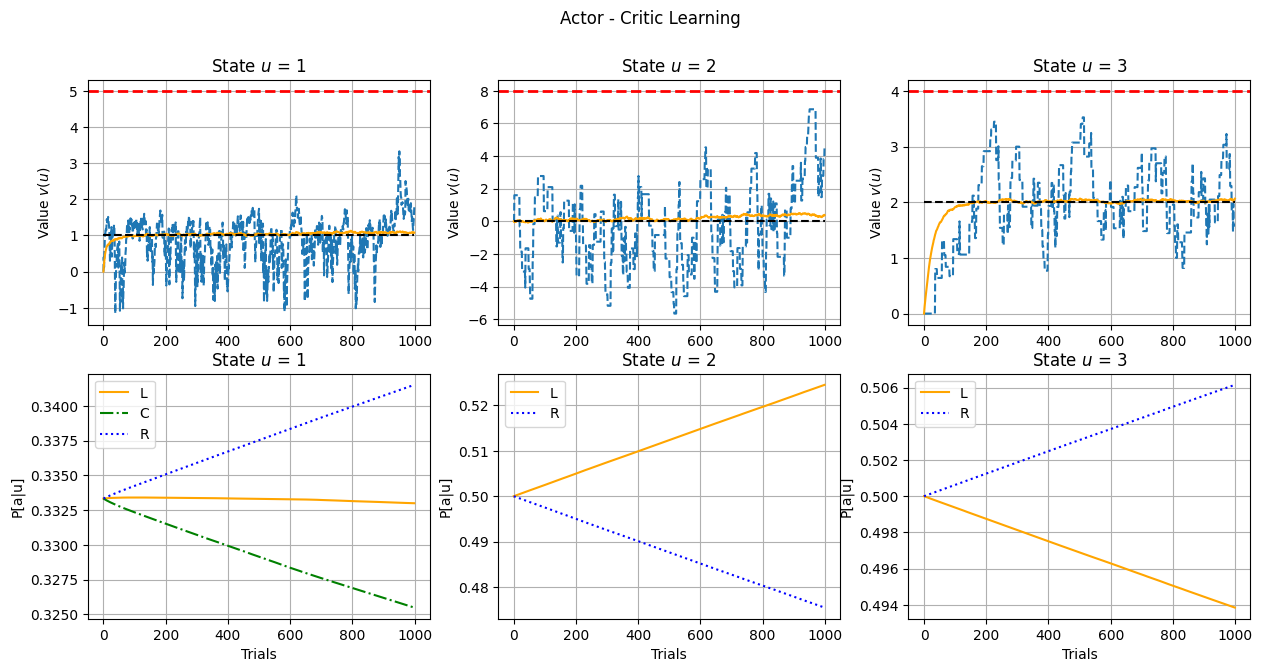

In [63]:
# Plot 9.9 
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))
titles = ['State $u$ = 1', 'State $u$ = 2', 'State $u$ = 3']
for state in range(states):

    # First rep and average over reps 
    v = v_all[1]
    v_mean = np.mean(v_all, axis=0)

    # Plot top
    ax[0][state].plot(range(trials), v[:, state], '--')
    ax[0][state].plot(range(trials), v_mean[:, state], c='orange')
    dash = np.full((trials), v_exp[state])
    ax[0][state].plot(range(trials), dash, '--', c='black')
    ax[0][state].set_ylabel('Value $v(u)$')
    ax[0][state].title.set_text(titles[state])
    ax[0][state].grid()
    if state == 0: 
        a = 5
    elif state == 1: 
        a = 8
    else: 
        a = 4

    ax[0][state].axhline(y=a, color='r', linestyle='--', linewidth=2)

    # Plot bottom
    lines = ['-', '-.', ':']
    actions = ['L', 'C', 'R']
    col = ['orange', 'green', 'blue']
    for j in range(len(rewards[state])):
        if len(rewards[state]) == 2: 
            lines = ['-', ':']
            actions = ['L','R']
            col = ['orange','blue']
        ax[1][state].plot(range(trials), p_all[state][:, j], lines[j], label=actions[j], c=col[j])
        ax[1][state].set_xlabel('Trials')
        ax[1][state].set_ylabel('P[a|u]')
        ax[1][state].title.set_text(titles[state])
        ax[1][state].legend()
    ax[1][state].grid()
plt.suptitle('Actor - Critic Learning')
plt.show()


In [64]:
# Maze task 
def update_act_maze(state, t, policy):
    value = random.uniform(0, 1)
    if state == 0: 
        if value <= policy[state][t, 0]:
            return 0, False
        else: 
            return 1, False
    else: 
        if value <= policy[state][t, 0]:
            return 0, True
        else: 
            return 1, True

  
def update_maze(lr_actor, lr, beta, trials, states, rewards):
    # Initialize storing vector 
    v = np.zeros((trials, states))
    policy = {i: np.zeros((trials, len(rewards[i]))) for i in range(len(rewards))}
    m = {i: np.zeros((trials, len(rewards[i]))) for i in range(len(rewards))}
    # Soft max function for initial
    for state in range(len(rewards)): 
        policy[state][0] = np.exp(m[state][0])/np.sum(np.exp(m[state][0]))
    # Go through trials
    for t in range(1, trials): 
        # Update from previous
        for state in range(states):
            m[state][t] = m[state][t-1] 
            policy[state][t] = policy[state][t-1]
            v[t] = v[t-1]

        # Go through states
        state = 0  # Initial
        terminal = False
        while not terminal: 
            action, terminal= update_act_maze(state, t, policy)
            if action == 0: 
                state_n = 1 
            else: 
                state_n = 2
            rew = rewards[state][action]
            v_next = 0 if terminal else v[t, state_n]
            sigma = rew + v_next - v[t, state]
            # Action values
            m[state][t, action] = m[state][t, action] + lr_actor * sigma
            #for i in range(3):
                #if i != action: 
                    #m[state][t, i] = (1-lr_actor)* m[state][t, action]
            
            # Softmax
            policy[state][t] = np.array([np.exp(m[state][t]*beta)])/np.sum(
                        np.exp(m[state][t]))

            # Update v
            v[t, state] += lr * sigma 
            state = state_n
    return v, policy

states = 3
reps = 1000
trials = 1000
rewards = {0: {0: 0, 1: 0}, 
           1:{0: 4, 1: 8}, 
           2:{0: 2, 1: 8}}
v_all = []
p_all = {0:[], 1:[], 2:[]}
for rep in range(reps): 
    v, policy = update_maze(0.075, 0.2, 1, trials, states, rewards)
    v_all.append(v)

    for state in range(states): 
        p_all[state].append(policy[state])

v_all = np.asarray(v_all)
for state in p_all:
    p_all[state] = np.mean(np.asarray(p_all[state]), axis=0)


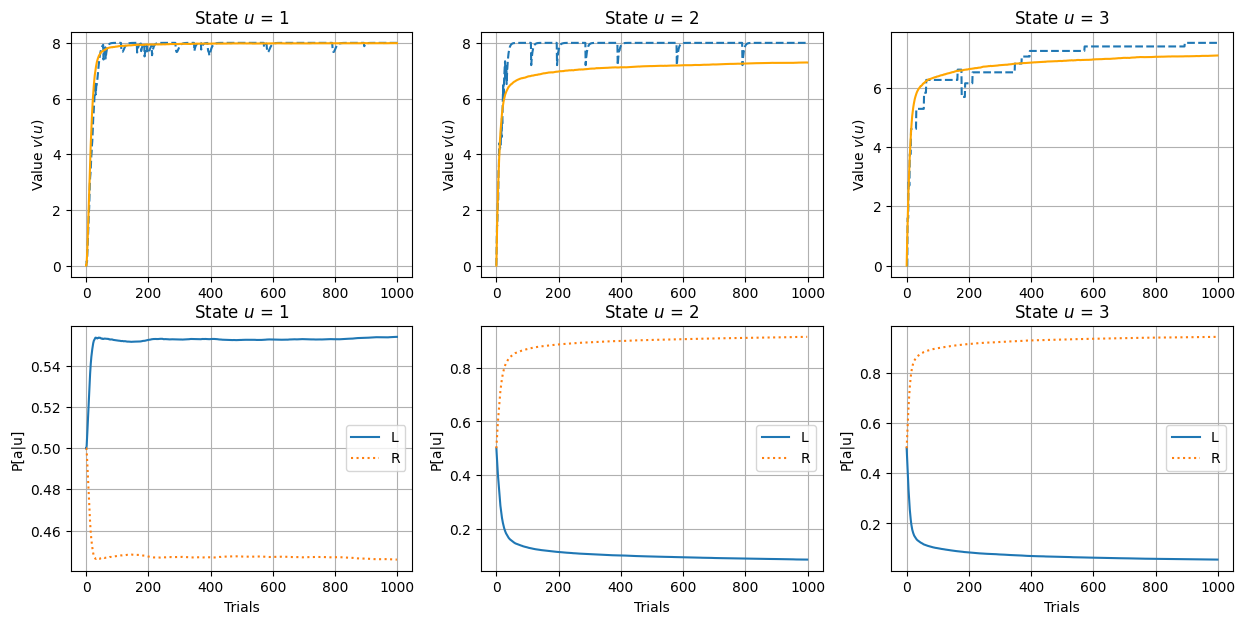

In [65]:
# Plots maze

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))
titles = ['State $u$ = 1', 'State $u$ = 2', 'State $u$ = 3']
for state in range(states):

    # First rep and average over reps 
    v = v_all[1]
    v_mean = np.mean(v_all, axis=0)

    # Plot top
    ax[0][state].plot(range(trials), v[:, state], '--')
    ax[0][state].plot(range(trials), v_mean[:, state], c='orange')
    ax[0][state].set_ylabel('Value $v(u)$')
    ax[0][state].title.set_text(titles[state])
    ax[0][state].grid()

    # Plot bottom
    lines = ['-', ':']
    actions = ['L','R']

    for i, act in enumerate(actions): 
        ax[1][state].plot(range(trials), p_all[state][:, i], lines[i], label=actions[i])
        ax[1][state].set_xlabel('Trials')
        ax[1][state].set_ylabel('P[a|u]')
        ax[1][state].title.set_text(titles[state])
    ax[1][state].legend()
    ax[1][state].grid()

plt.show()
